In [2]:
import pandas as pd 
import json
import matplotlib.pyplot as plt


# 0. Load in data

In [11]:
df = pd.read_json("StreamingHistory0.json")

df["endTime"].value_counts()

max_song_length = 500000
history_2021 = df[df["endTime"].str.contains("2021-")]
#A song is here defined as something being shorter than 8.333 minutes
history_2021_songs = history_2021[history_2021["msPlayed"] < max_song_length]
history_2021_songs.nlargest(10,"msPlayed")

top_25_artists = history_2021_songs["artistName"].value_counts()[0:25]
top_25_df = history_2021_songs[history_2021_songs["artistName"].isin(top_25_artists.index)]

sum_top_25 = top_25_df.groupby("artistName").sum()
sum_top_25_total = sum(top_25_df.groupby("artistName").sum()["msPlayed"])

max_val = max(top_25_df.groupby("artistName").sum()["msPlayed"])
sum_top_25[sum_top_25["msPlayed"] == max_val]

percentage_top_25 = sum_top_25["msPlayed"]/sum_top_25_total

pd.DataFrame(percentage_top_25)

,msPlayed
artistName,
24kGoldn,0.045657
A$AP Rocky,0.048541
Andrea Borselli,0.040959
Art Garfunkel,0.068321
Childish Gambino,0.057621
Dave,0.022072
Drake,0.022582
Ghost,0.130968
J. Cole,0.019010


# 1.1 Code block to get top artists of 2021 

C:\Users\Anton\AppData\Local\Temp/ipykernel_8764/3557345432.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


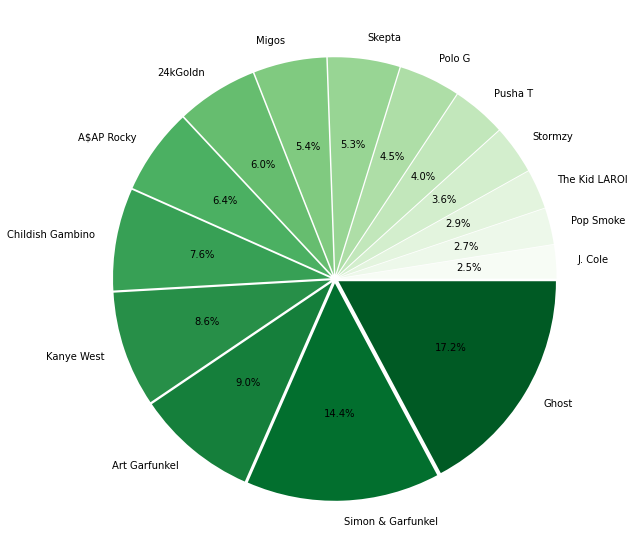

In [4]:
def get_top_x_artists(num):
    top_x_artists = history_2021_songs["artistName"].value_counts()[0:num]
    top_x_df = history_2021_songs[history_2021_songs["artistName"].isin(top_x_artists.index)]

    sum_top_x = top_x_df.groupby("artistName").sum()
    sum_top_x_total = sum(top_x_df.groupby("artistName").sum()["msPlayed"])
    max_val = max(top_x_df.groupby("artistName").sum()["msPlayed"])
    sum_top_x[sum_top_x["msPlayed"] == max_val]

    percentage_top_x = sum_top_x["msPlayed"]/sum_top_x_total

    return pd.DataFrame(percentage_top_x)

num = 15
new_df = get_top_x_artists(num)
sorted_df = new_df.sort_values(["msPlayed"])
my_labels = sorted_df.index
my_explode = [0.02] * num
fig, ax = plt.subplots(figsize=(10, 10)) 
theme = plt.get_cmap('Greens')
ax.set_prop_cycle("color", [theme(1. * i / len(sorted_df["msPlayed"]))
                             for i in range(len(sorted_df["msPlayed"]))])
ax.pie(sorted_df["msPlayed"], labels = my_labels, explode = my_explode, autopct = '%1.1f%%')
fig.show()




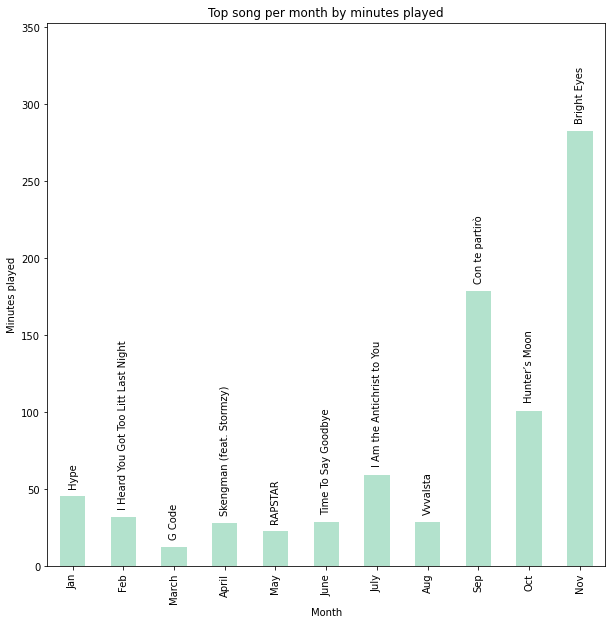

In [281]:
months = ["%.2d" % i for i in range(12)]
months.pop(0)


def top_songs_month():
    top_songs_month = {}
    for i in months:
        month_songs = history_2021_songs[history_2021_songs["endTime"].str.contains(f"2021-{i}-")]
        top_songs_month[i] = month_songs["trackName"].value_counts()[0:3]
    return top_songs_month
        
def ms_songs_month():
    ms_songs_month = {}
    
    for i in months: 
        month_songs = history_2021_songs[history_2021_songs["endTime"].str.contains(f"2021-{i}-")]
        summed_tracks = pd.DataFrame(month_songs.groupby(["trackName"]).sum())
        top_song = summed_tracks[summed_tracks["msPlayed"] == max(summed_tracks["msPlayed"])] 
        ms_songs_month[i] = top_song
        
    return ms_songs_month
        

month_names = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov"]

top_songs_ms = ms_songs_month()
top_songs_ms = pd.concat(a.values(), ignore_index=False) 
top_songs_ms["month"] = month_names
top_songs_ms["trackName"] = top_songs_ms.index
top_songs_ms = top_songs_ms.reset_index(drop = True)
top_songs_ms["minutesPlayed"] = (top_songs_ms["msPlayed"] / (60*1000) )

fig, ax = plt.subplots(figsize=(10, 10)) 
ax = top_songs_ms["minutesPlayed"].plot(kind="bar",cmap ="Pastel2")
ax.set_title("Top song per month by minutes played")
ax.set_xlabel("Month")
ax.set_ylabel("Minutes played")
ax.set_xticklabels(top_songs_ms["month"])

labels = top_songs_ms["trackName"]
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() /2, height+5, label, ha="center", va="bottom", rotation=90
    )
plt.margins(y=0.25)
plt.show()







In [46]:
#IDEAS:
# CREATE DASHBOARD FOR TOP ARTIST PER MONTH
# Top artists by msPlayed in 2021 Pie chart - DONE
# Top songs ever, by time played and by msPlayed

#Artist most often played, with least amount of minutes played
#Artist least often played, with most amount of minutes played

In [215]:
top_songs_ms["minutesPlayed"] = (top_songs_ms["msPlayed"] / (60*1000) )
top_songs_ms

,msPlayed,month,trackName,minutesPlayed
0,2731372,Jan,Hype,45.522867
1,1916268,Feb,I Heard You Got Too Litt Last Night,31.937800
2,757839,March,G Code,12.630650
3,1696094,April,Skengman (feat. Stormzy),28.268233
4,1366490,May,RAPSTAR,22.774833
5,1724743,June,Time To Say Goodbye,28.745717
6,3572099,July,I Am the Antichrist to You,59.534983
7,1714268,Aug,Vvvalsta,28.571133
8,10701841,Sep,Con te partirò,178.364017
9,6063582,Oct,Hunter’s Moon,101.059700


In [140]:
months


['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']

In [96]:
summed_tracks[summed_tracks["msPlayed"] == max(summed_tracks["msPlayed"])]

,msPlayed
trackName,
Hype,2731372
